# Lab 6

Author: Ryan Rosiak [rrosiak1@gulls.salisbury.edu]

Date: 11/12/20

Description: Working with the iris dataset and the adult dataset and testing K-Nearest Neigbors on each

In [22]:
import matplotlib.pyplot as plt # Matplotlib library
import numpy.linalg as la # Linear algebra library
import numpy as np # Numby library
import pandas as pd # Pandas library
import math # Math library
import random # Random library

In [124]:
# KNN Class
class KNN:
    def __init__(self, k):
        self.k = k
        self.trainarr = []
        self.classifier_list = []
        self.predicted_points = []
        
    def distance(self, point):
        """
        Finds the distance of every training set value from point, and then returns the as list of tuples sorted in ascending order 
        by distance values paired with the corresponding "classifier"
        """
        distance_pairs_list = []
        for i in self.trainarr:
            distance_pairs_list.append((la.norm(np.array(point) - np.array(i[0])), i[1]))
        distance_pairs_list.sort(key= lambda x: x[0])
        return distance_pairs_list
    
    def train(self, tlist):
        """
        Takes a list of training data => tuple containing a samples X ndims list and it's associated classifier 
        that will be stored for later
        """
        self.trainarr = tlist
        self.classifier_list = list(set([i[1] for i in self.trainarr]))
        
    def predict(self, point):
        """ 
        Point must be a list, same dimension as the training set
        """
        classifier_counts = {i[1]: 0 for i in self.trainarr}
        distance_list = self.distance(point)
        key_select = ''
        for index,item in enumerate(distance_list):
            if index < self.k:
                classifier_counts[item[1]] += 1
            else:
                max_dict_val = max([value for key,value in classifier_counts.items()])
                #max_dict_val = max(classifier_counts, key=classifier_counts.get)
                if list(classifier_counts.values()).count(max_dict_val) > 1:
                    classifier_counts[item[1]] += 1
                else:
                    for key, value in classifier_counts.items():
                        if value == max_dict_val:
                            key_select = key
                            break
                    break
        print(f'I am predicting that the classifier for point {point} is... {key_select}!')
        self.predicted_points.append((point, key_select))
        return key_select
        
    def plot_train(self):
        """
        Can only plot for 2d data
        """
        colors = ['Green', 'Red', 'Blue', 'Black', 'Yellow', 'Pink', 'Brown', 'Purple']
        for ind, item in enumerate(self.classifier_list):
            plotx = [j[0][0] for j in self.trainarr if j[1] == item]
            ploty = [j[0][1] for j in self.trainarr if j[1] == item]
            plt.scatter(x=plotx, y=ploty, c=colors[ind], label=item)
        plt.title('Plot of sample training data')
        plt.legend()
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.show()
        
    def plot_train_and_predictions(self):
        """
        Can only plot for 2d data, plots the point that was predicted
        """
        colors = ['Green', 'Red', 'Blue', 'Black', 'Yellow', 'Pink', 'Brown', 'Purple']
        for ind, item in enumerate(self.classifier_list):
            plotxtrain = [j[0][0] for j in self.trainarr if j[1] == item]
            plotytrain = [j[0][1] for j in self.trainarr if j[1] == item]
            plotxpredict = [j[0][0] for j in self.predicted_points if j[1] == item]
            plotypredict = [j[0][1] for j in self.predicted_points if j[1] == item]
            plt.scatter(x=plotxtrain, y=plotytrain, c=colors[ind], label=item)
            plt.scatter(x=plotxpredict, y=plotypredict, c=colors[ind], label='Predicted', marker='^')
        plt.title('Plot of sample training data and predicted points')
        plt.legend()
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.show()

In [125]:
# 1.  Begin by implementing the k-Nearest Neighbors (kNN) classification algorithm
# (a)  Use a Python class with internal parameter k and methods train and predict.
# i.  The train method should take in an array of pre-labeled data and store them to be used in the kN N calculation later.
# ii.  The predict method should take in a single data point (of the same dimension as those usedin training) and return the label of 
# the kNN decision.  
# Keep in mind that, in general, you may have to choose between multiple labels.  In this case, ties are possible, 
# but you can justdecide to break them randomly or increase k to get more votes.
iris_data = pd.read_csv('./iris.data',
                        header=None,
                        names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
                       )
                        
iris_data.head() # Print some of the data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
adult_data = pd.read_csv('./adult.data',
                      header=None,
                      skipinitialspace=True,
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ]
                     )
adult_data.head() # Printing the first couple sets of data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


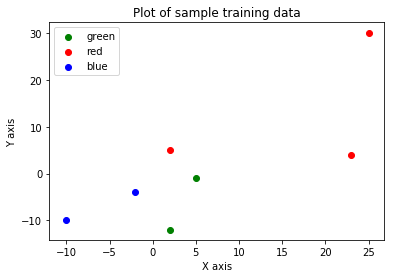

I am predicting that the classifier for point [10, 10] is... red!
I am predicting that the classifier for point [2, 0] is... green!
I am predicting that the classifier for point [15, 20] is... red!
I am predicting that the classifier for point [0, -5] is... green!
I am predicting that the classifier for point [-5, -10] is... blue!
I am predicting that the classifier for point [15, -10] is... green!


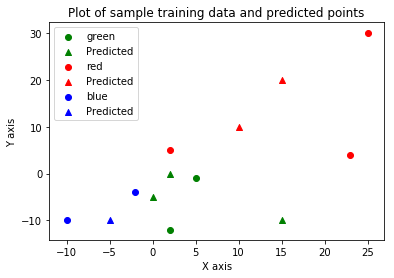

In [127]:
# (b)  Test the algorithm on some simple hand-made data that you can easily visualize or inspect to check for correct behavior.
knn1 = KNN(3)
train1 = [([23, 4], 'red'), ([5, -1], 'green'), ([-2, -4], 'blue'), ([2, 5], 'red'), ([25, 30], 'red'), 
          ([2, -12], 'green'), ([-10, -10], 'blue')]
knn1.train(train1)
knn1.plot_train()
knn1.predict([10, 10])
knn1.predict([2,0])
knn1.predict([15,20])
knn1.predict([0,-5])
knn1.predict([-5, -10])
knn1.predict([15, -10])
knn1.plot_train_and_predictions()

In [ ]:
# 2.  Write a python routines to split a given data set (randomly) into testing and training subsets.  It’s a good idea to parameterize 
# this process with a percentage p so the data is split into sets of size np and n(1−p); 
# then you can “tune” p later for your specific training/testing procedure.


In [ ]:
# 3.  Using the iris dataset, test your kN N algorithm to predict which class a given iris belongs to.
# (a)  Show some confusion matrices for different size testing versus training datasets.


In [ ]:
# (b)  How does the accuracy change for different size training sets?  Show how the accuracy changeswithin the training set and testing set separately.


In [ ]:
# (c)  What if you repeat this process,  keeping the training fractionpthe same?  Does the accuracychange drastically based on the “quality” of the testing set? How might you quantify this behavior?


In [ ]:
# 4.  Try using the adult dataset to also do some prediction of income level (more or less than $50k).
# (a)  How  can  you  try  to  quantify  the  “distance”  between  two  adults?   Write  some  small  pythonfunctions to try and transform this data into something that can be used by thekN Nclassifier.
# Try a couple different approaches,  report their different behaviors and illustrate using learningcurves, confusion matrices, and possibly some statistical measurements.


In [ ]:
# (b)  Are there other “labels” within the dataset that can be effectively learned by thekN Nclassifier?
